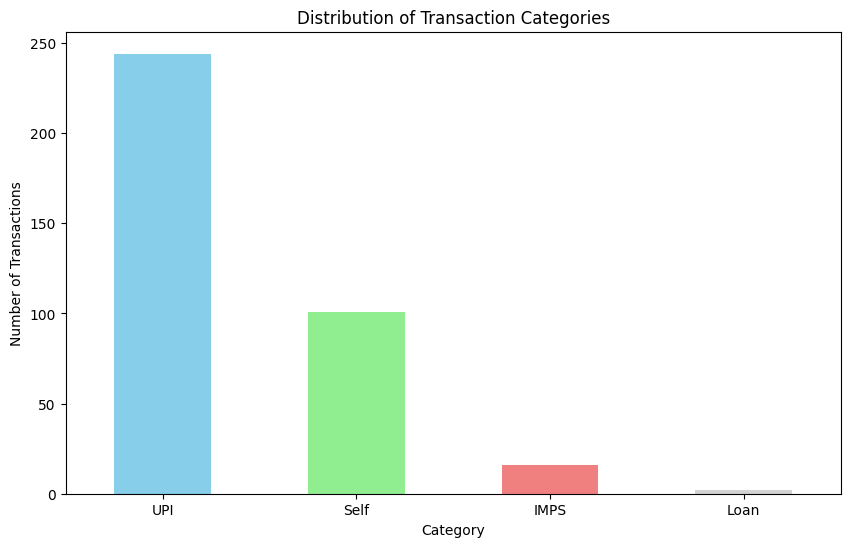

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# First step i loaded the excel file
file_path = r'C:\Users\Gowtham\Desktop\credit_card_transcation\Book1.xlsx'  # Using raw string
df = pd.read_excel(file_path)

# Defining a function to categorize transactions based on the description
def categorize_transaction(description):
    description = str(description).lower()
    if "upi" in description:
        return "UPI"
    elif "imps" in description:
        return "IMPS"
    elif "emi" in description or "loan" in description:
        return "Loan"
    else:
        return "Self"

# Creating a new column 'Category'
df['Category'] = df['Description'].apply(categorize_transaction)

# Save the updated dataframe to a new Excel file
output_file_path = r'C:\Users\Gowtham\Desktop\credit_card_transcation\Updated_Book1.xlsx'  # Using raw string
df.to_excel(output_file_path, index=False)

# I used Visualization for better understanding
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'lightgray'])
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


In [7]:
updated_df = pd.read_excel(r'C:\Users\Gowtham\Desktop\credit_card_transcation\Updated_Book1.xlsx')

In [9]:
updated_df.head()

,Date,Description,Chq No,Credit,Debit,Balance,Category
0,2024-01-01,UPI/P2A/436737414449/P SELVARA/Indian Ov/abthu...,,6000,,1292716.38,UPI
1,2024-01-01,UPI/P2A/400114040407/ILAYARAJA/Karur Vys/malar...,,9000,,1301716.38,UPI
2,2024-01-01,AUR008208534078_EMI_01-01-2024_S BALAJI,,,21853,1279863.38,Loan
3,2024-01-01,EDC/42871-42886-/M037345012240028,,284055,,1563918.38,Self
4,2024-01-01,UPI/P2A/400150094918/INDIRA N/UCO Bank/malarava/,,9170,,1573088.38,UPI


In [13]:
import pandas as pd

# Load both Excel files into DataFrames
file1_path = r'C:\Users\Gowtham\Desktop\credit_card_transcation\Book1.xlsx'
file2_path = r'C:\Users\Gowtham\Desktop\credit_card_transcation\Updated_Book1.xlsx'

df1 = pd.read_excel(file1_path)
df2 = pd.read_excel(file2_path)
df1_sorted = df1.sort_values(by=['Date', 'Description']).reset_index(drop=True)
df2_sorted = df2.sort_values(by=['Date', 'Description']).reset_index(drop=True)

merged_df = pd.merge(df1_sorted, df2_sorted, on=['Date', 'Description'], suffixes=('_file1', '_file2'))

# Compare columns from both files
columns_to_compare = ['Chq No', 'Credit', 'Debit', 'Balance', 'Category']
accuracy_scores = {}

for column in columns_to_compare:
    column_file1 = f'{column}_file1'
    column_file2 = f'{column}_file2'
    
    # Check if the column exists in both DataFrames
    if column_file1 in merged_df.columns and column_file2 in merged_df.columns:
        # Calculate accuracy for this column
        correct_matches = (merged_df[column_file1] == merged_df[column_file2]).sum()
        total_comparisons = len(merged_df)
        accuracy = correct_matches / total_comparisons
        accuracy_scores[column] = accuracy
    else:
        accuracy_scores[column] = None  # Column missing in one of the DataFrames

# Print accuracy scores for each column
for column, accuracy in accuracy_scores.items():
    if accuracy is not None:
        print(f'Accuracy for {column}: {accuracy:.2%}')
    else:
        print(f'Column {column} is missing in one of the files.')


Accuracy for Chq No: 100.00%
Accuracy for Credit: 100.00%
Accuracy for Debit: 100.00%
Accuracy for Balance: 100.00%
Column Category is missing in one of the files.
